In [1]:
import matplotlib.pyplot as plt
import pathlib


In [2]:
data = {
    "duck": {},
    "pg": {},
    "mysql": {},
    "click": {}
}

stats_dir = pathlib.Path('stats')
for stat in stats_dir.glob('*.stat'):
    # run db2 data on db1
    db1, _, db2 = stat.stem.split('_')
    numbers = []
    with stat.open('r') as f:
        for line in f:
            numbers.append(int(line.strip()))
    data[db2][db1] = numbers

data

{'duck': {'mysql': [8107, 229, 349],
  'click': [7851, 382, 452],
  'pg': [6695, 1575, 415]},
 'pg': {'mysql': [581, 0, 27], 'duck': [531, 31, 46], 'click': [588, 14, 6]},
 'mysql': {'click': [1784, 69, 46],
  'pg': [1875, 12, 12],
  'duck': [1869, 22, 8]},
 'click': {'pg': [6823, 99, 139],
  'mysql': [6796, 255, 10],
  'duck': [6786, 137, 138]}}

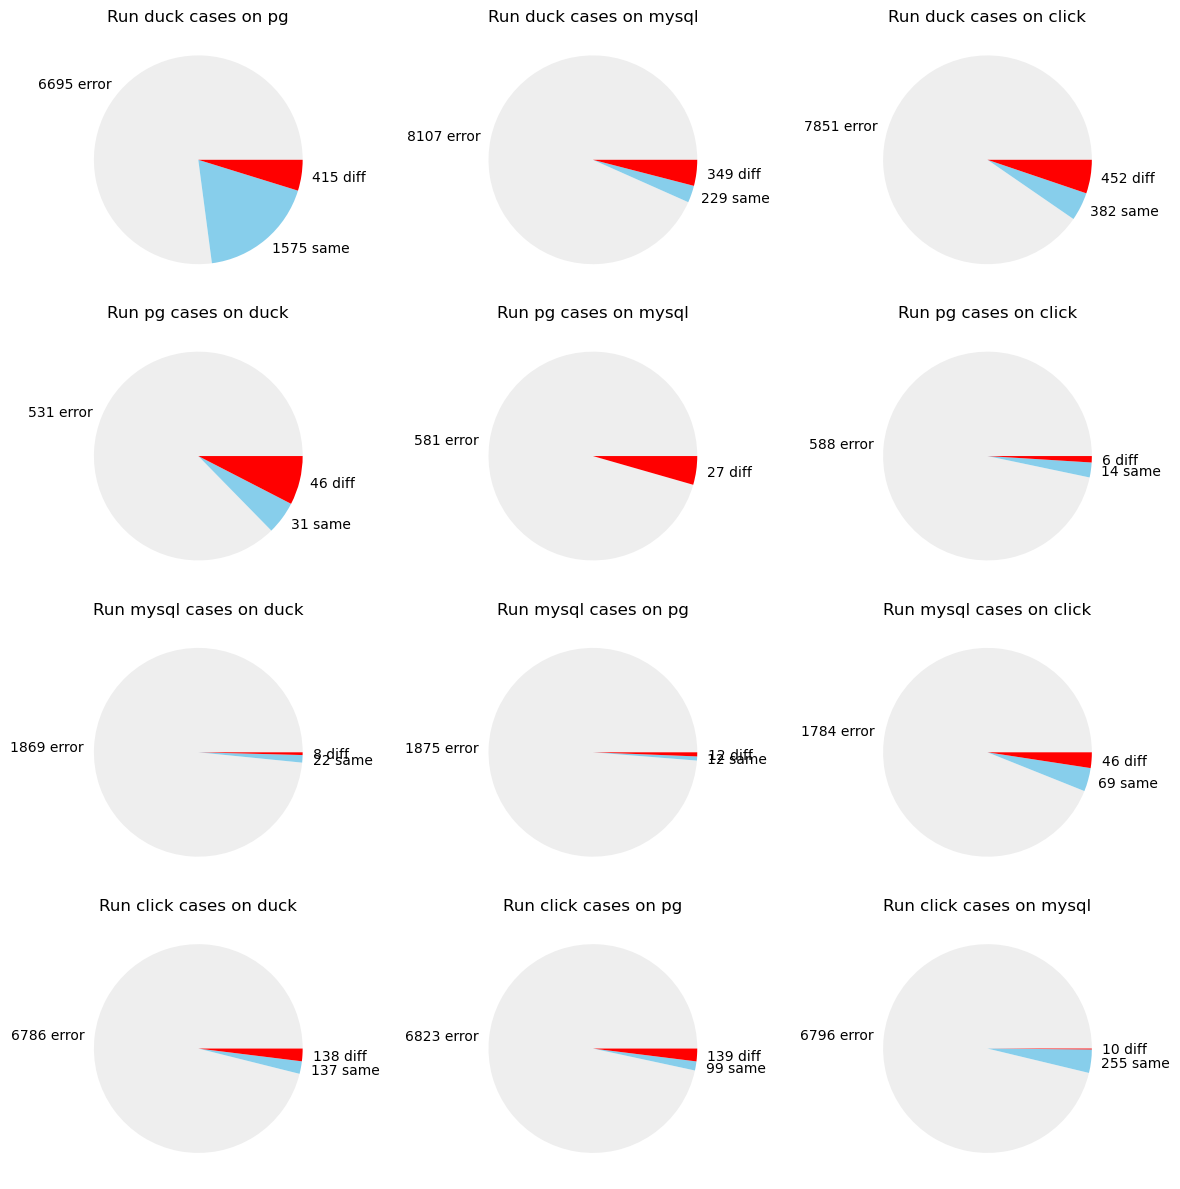

In [3]:
# Create a figure and a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Define the keys for rows and columns
dbs = ["duck", "pg", "mysql", "click"]
db_mat = []
for db1 in dbs:
    row = []
    for db2 in dbs:
        if db2 != db1:
            row.append(db2)
    db_mat.append(row)

# Loop over the rows and columns to populate the pie charts
for i, row in enumerate(db_mat):
    for j, db2 in enumerate(row):
        ax = axes[i, j]
        db1 = dbs[i]
        
        pair_data = data[db1][db2]
        labels = [f"{pair_data[0]} error", f"{pair_data[1]} same", f"{pair_data[2]} diff"]
        colors = ['#EEEEEE', 'skyblue', 'red']
        
        pair_data_ = []
        labels_ = []
        colors_ = []
        for k in range(3):
            if pair_data[k] == 0:
                continue
            pair_data_.append(pair_data[k])
            labels_.append(labels[k])
            colors_.append(colors[k])
        
        ax.pie(pair_data_, labels=labels_, autopct='', startangle=0, colors=colors_)
        
        # # error, same, diff -> error, diff, same
        # pair_data = [pair_data[0], pair_data[2], pair_data[1]]
        # labels = [f"{pair_data[0]}error", f"{pair_data[2]}diff", f"{pair_data[1]}same"]
        # ax.pie(pair_data, labels=labels, autopct='', startangle=0, colors=['#EEEEEE', 'red', 'skyblue'])
        
        # run db1 data on db2
        ax.set_title(f"Run {db1} cases on {db2}")

# Adjust the layout to make sure everything fits
plt.tight_layout()
# Show the plot
plt.savefig('pie.pdf')


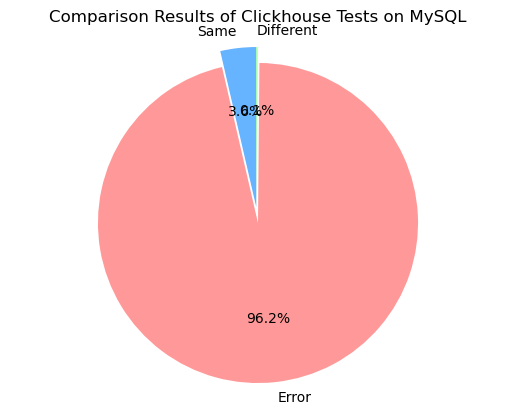

In [4]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Same', 'Error', 'Different']
sizes = [255, 6796, 10]
colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e., 'Error')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison Results of Clickhouse Tests on MySQL')
plt.show()
